In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, matthews_corrcoef, roc_curve
from scipy import stats
import numpy as np
import scikitplot as skplt
import matplotlib.colors
%matplotlib inline

In [6]:
df = pd.read_csv('arrow_plot_results_processed_for_analysis.csv')
df.head()

,old,new,old_masked,new_masked,label,donor_naturalness_score,style_naturalness_score,naturalness_delta,old_processed,new_processed,style_naturalness_mturk_score,style_naturalness_mturk_probability,style_authorship_score,authorship_delta,donor_authorship_score,donor_naturalness_mturk_probability_score,donor_naturalness_mturk_probability
0,"""Therefore no one inhabits it; only, you see...",Therefore no one inhabits it; I think I see no...,"`` Therefore no one inhabits it; only, you se...",Therefore no one inhabits it; I think I see n...,D2A,1.00,0.96,-0.04,"""Therefore no one inhabits it; only, you see...",Therefore no one inhabits it; I think I see no...,3.33,0.67,0.012783,0.010925,0.001858,3.50,0.70
1,"""Therefore no one inhabits it; only, you see...","Therefore no one inhabits it; I, as you, know ...","`` Therefore no one inhabits it; only, you se...","Therefore no one inhabits it; I, as you, know...",D2N,1.00,0.96,-0.04,"""Therefore no one inhabits it; only, you see...","Therefore no one inhabits it; I, as you, know ...",2.67,0.53,0.014756,0.012938,0.001818,3.50,0.70
2,"""What! arrest you, my most faithful servant?""...","What! If the officer is of the line, my most f...","`` What! arrest you, my most faithful servant...","What! If the officer is of the line, my most ...",D2A,0.24,0.99,0.75,"""What! arrest you, my most faithful servant?""...","What! If the officer is of the line, my most f...",2.67,0.53,0.005994,0.004301,0.001693,4.17,0.83
3,"""What! arrest you, my most faithful servant?""...","What! You�ll arrest me, my most faithful serva...","`` What! arrest you, my most faithful servant...","What! You�ll arrest me, my most faithful serv...",D2N,0.24,0.14,-0.10,"""What! arrest you, my most faithful servant?""...","What! Youll arrest me, my most faithful servan...",3.33,0.67,0.009262,0.006997,0.002265,4.17,0.83
4,"and positively declared, that he would still ...","and positively declared, �I�m going to love hi...","and positively declared, that he would still ...","and positively declared, �I�m going to love h...",A2N,0.99,0.96,-0.03,"and positively declared, that he would still ...","and positively declared, Im going to love him ...",3.67,0.73,0.011888,0.006844,0.005043,4.00,0.80


In [7]:
stats.pearsonr(df['style_naturalness_score'].values, df['style_naturalness_mturk_probability'])

(-0.03713215952534056, 0.787816474693466)

In [8]:
stats.pearsonr(df['donor_naturalness_score'].values, df['donor_naturalness_mturk_probability'])

(-0.21678778552670627, 0.11188355131189517)

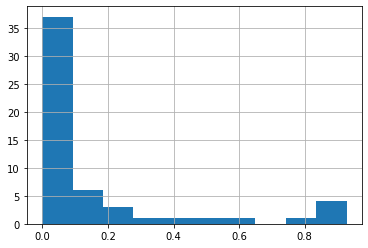

In [9]:
df['authorship_delta'].hist()

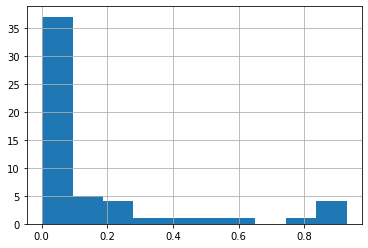

In [10]:
df['style_authorship_score'].hist()

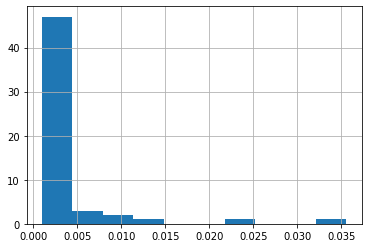

In [11]:
df['donor_authorship_score'].hist()

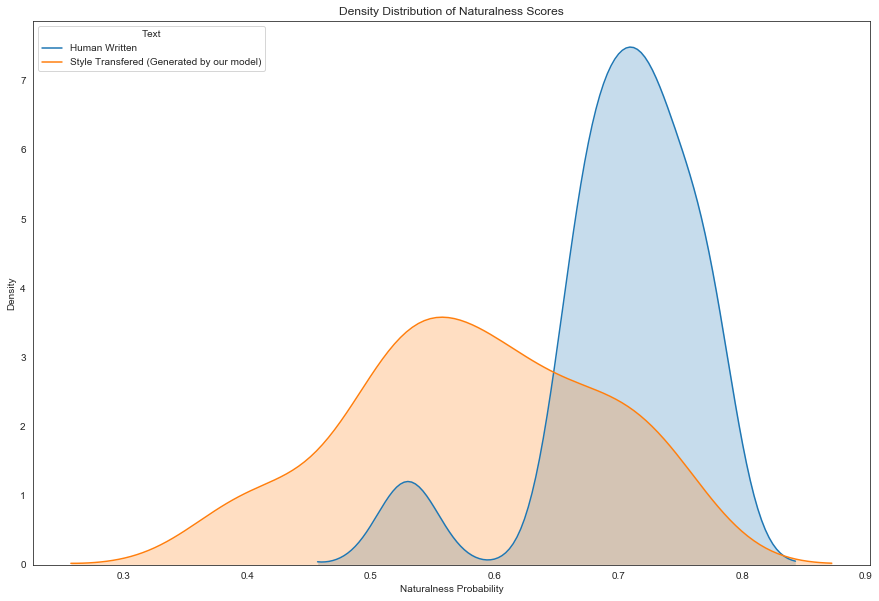

In [238]:
plt.figure(figsize=(15,10));
plt.title('Density Distribution of Naturalness Scores');
sns.kdeplot(df['donor_naturalness_mturk_probability'], shade=True, clip=[0,0.8]);
sns.kdeplot(df['style_naturalness_mturk_probability'], shade=True, clip=[0, 0.8]);
plt.legend(title='Text', loc='upper left', labels=['Human Written', 'Style Transfered (Generated by our model)']);
plt.xlabel('Naturalness Probability')
plt.ylabel('Density')
plt.savefig('DistributionDeltaNaturalnessScores_mturk_test');
plt.show()

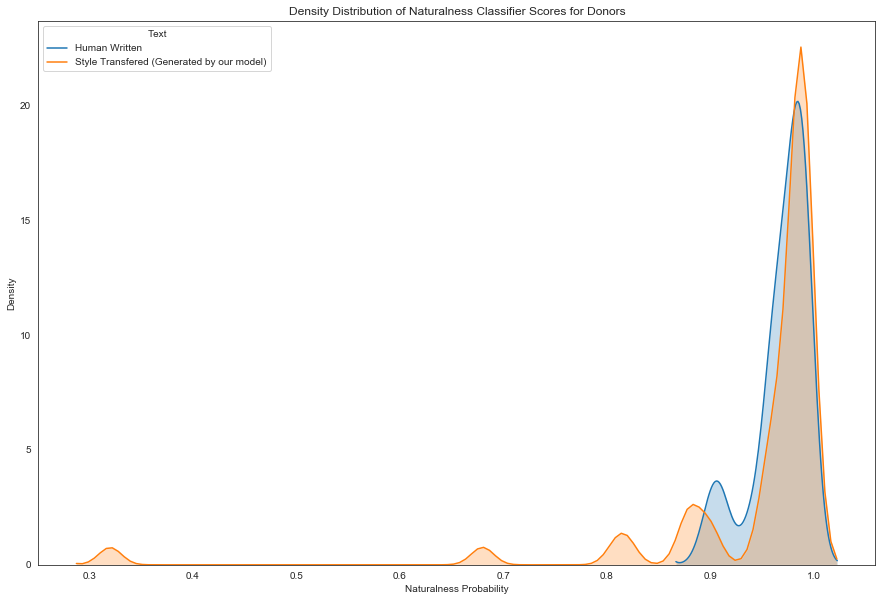

In [239]:
plt.figure(figsize=(15,10));
plt.title('Density Distribution of Naturalness Classifier Scores for Donors');
sns.kdeplot(df['donor_naturalness_score'], shade=True, clip=[0.3,1]);
sns.kdeplot(df['style_naturalness_score'], shade=True, clip=[0.3,1]);
plt.legend(title='Text', loc='upper left', labels=['Human Written', 'Style Transfered (Generated by our model)']);
plt.xlabel('Naturalness Probability')
plt.ylabel('Density')
plt.savefig('DistributionDeltaNaturalnessScores_test');
plt.show()

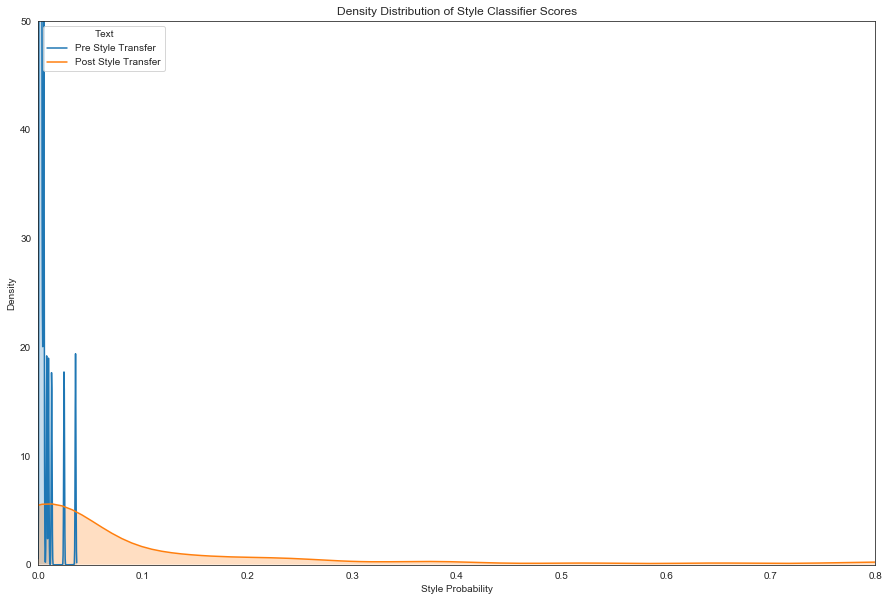

In [242]:
plt.figure(figsize=(15,10));
plt.title('Density Distribution of Style Classifier Scores');
sns.kdeplot(df['donor_authorship_score'], shade=True);
sns.kdeplot(df['style_authorship_score'], shade=True);
plt.legend(title='Text', loc='upper left', labels=['Pre Style Transfer', 'Post Style Transfer']);
plt.xlabel('Style Probability')
plt.ylabel('Density')
plt.ylim(0,50)
plt.xlim(0,0.8)
plt.savefig('DistributionDeltaStyleScores');
plt.show()

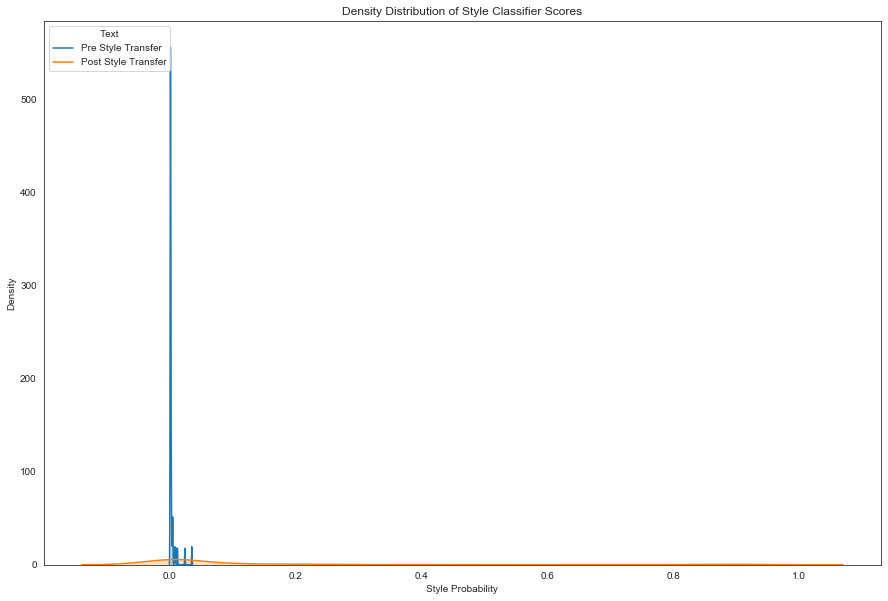

In [143]:
plt.figure(figsize=(15,10));
plt.title('Density Distribution of Style Classifier Scores');
sns.kdeplot(df['donor_authorship_score'], shade=True);
sns.kdeplot(df['style_authorship_score'], shade=True);
plt.legend(title='Text', loc='upper left', labels=['Pre Style Transfer', 'Post Style Transfer']);
plt.xlabel('Style Probability')
plt.ylabel('Density')
#plt.ylim(0,50)
#plt.xlim(0)
plt.savefig('DistributionDeltaStyleScores');
plt.show()

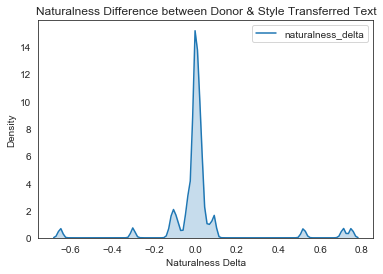

In [124]:
sns.kdeplot(df['naturalness_delta'], shade=True);
plt.xlabel('Naturalness Delta')
plt.ylabel('Density')
plt.title('Naturalness Difference between Donor & Style Transferred Text')
plt.savefig('NaturalnessDelta')

In [13]:
df['clf_style_label'] = (df['style_naturalness_score'] > 0.97) * 1
df['style_label'] = (df['style_naturalness_mturk_probability'] > 0.60) * 1
df.head(3)

,old,new,old_masked,new_masked,label,donor_naturalness_score,style_naturalness_score,naturalness_delta,old_processed,new_processed,style_naturalness_mturk_score,style_naturalness_mturk_probability,style_authorship_score,authorship_delta,donor_authorship_score,donor_naturalness_mturk_probability_score,donor_naturalness_mturk_probability,clf_style_label,style_label
0,"""Therefore no one inhabits it; only, you see...",Therefore no one inhabits it; I think I see no...,"`` Therefore no one inhabits it; only, you se...",Therefore no one inhabits it; I think I see n...,D2A,1.00,0.96,-0.04,"""Therefore no one inhabits it; only, you see...",Therefore no one inhabits it; I think I see no...,3.33,0.67,0.012783,0.010925,0.001858,3.50,0.70,0,1
1,"""Therefore no one inhabits it; only, you see...","Therefore no one inhabits it; I, as you, know ...","`` Therefore no one inhabits it; only, you se...","Therefore no one inhabits it; I, as you, know...",D2N,1.00,0.96,-0.04,"""Therefore no one inhabits it; only, you see...","Therefore no one inhabits it; I, as you, know ...",2.67,0.53,0.014756,0.012938,0.001818,3.50,0.70,0,0
2,"""What! arrest you, my most faithful servant?""...","What! If the officer is of the line, my most f...","`` What! arrest you, my most faithful servant...","What! If the officer is of the line, my most ...",D2A,0.24,0.99,0.75,"""What! arrest you, my most faithful servant?""...","What! If the officer is of the line, my most f...",2.67,0.53,0.005994,0.004301,0.001693,4.17,0.83,1,0


In [14]:
df['style_label_unnatural_class'] = (~df['style_label'].astype('bool')).astype(int)
df['style_unnatural_score'] = 1 - df['style_naturalness_score']
df.head()

,old,new,old_masked,new_masked,label,donor_naturalness_score,style_naturalness_score,naturalness_delta,old_processed,new_processed,...,style_naturalness_mturk_probability,style_authorship_score,authorship_delta,donor_authorship_score,donor_naturalness_mturk_probability_score,donor_naturalness_mturk_probability,clf_style_label,style_label,style_label_unnatural_class,style_unnatural_score
0,"""Therefore no one inhabits it; only, you see...",Therefore no one inhabits it; I think I see no...,"`` Therefore no one inhabits it; only, you se...",Therefore no one inhabits it; I think I see n...,D2A,1.00,0.96,-0.04,"""Therefore no one inhabits it; only, you see...",Therefore no one inhabits it; I think I see no...,...,0.67,0.012783,0.010925,0.001858,3.50,0.70,0,1,0,0.04
1,"""Therefore no one inhabits it; only, you see...","Therefore no one inhabits it; I, as you, know ...","`` Therefore no one inhabits it; only, you se...","Therefore no one inhabits it; I, as you, know...",D2N,1.00,0.96,-0.04,"""Therefore no one inhabits it; only, you see...","Therefore no one inhabits it; I, as you, know ...",...,0.53,0.014756,0.012938,0.001818,3.50,0.70,0,0,1,0.04
2,"""What! arrest you, my most faithful servant?""...","What! If the officer is of the line, my most f...","`` What! arrest you, my most faithful servant...","What! If the officer is of the line, my most ...",D2A,0.24,0.99,0.75,"""What! arrest you, my most faithful servant?""...","What! If the officer is of the line, my most f...",...,0.53,0.005994,0.004301,0.001693,4.17,0.83,1,0,1,0.01
3,"""What! arrest you, my most faithful servant?""...","What! You�ll arrest me, my most faithful serva...","`` What! arrest you, my most faithful servant...","What! You�ll arrest me, my most faithful serv...",D2N,0.24,0.14,-0.10,"""What! arrest you, my most faithful servant?""...","What! Youll arrest me, my most faithful servan...",...,0.67,0.009262,0.006997,0.002265,4.17,0.83,0,1,0,0.86
4,"and positively declared, that he would still ...","and positively declared, �I�m going to love hi...","and positively declared, that he would still ...","and positively declared, �I�m going to love h...",A2N,0.99,0.96,-0.03,"and positively declared, that he would still ...","and positively declared, Im going to love him ...",...,0.73,0.011888,0.006844,0.005043,4.00,0.80,0,1,0,0.04


In [15]:
print(classification_report(df['style_label'], df['clf_style_label'], target_names=['Real', 'Style Transfered'] ))

                  precision    recall  f1-score   support

            Real       0.67      0.34      0.45        35
Style Transfered       0.38      0.70      0.49        20

       micro avg       0.47      0.47      0.47        55
       macro avg       0.52      0.52      0.47        55
    weighted avg       0.56      0.47      0.47        55



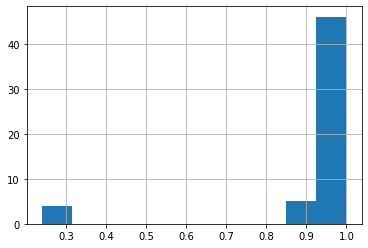

In [18]:
df['donor_naturalness_score'].hist()

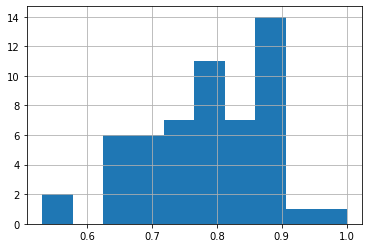

In [19]:
df['donor_naturalness_mturk_probability'].hist()

In [27]:
df[df['donor_naturalness_mturk_probability'] < 0.60]

,old,new,old_masked,new_masked,label,donor_naturalness_score,style_naturalness_score,naturalness_delta,old_processed,new_processed,...,donor_naturalness_mturk_probability_score,donor_naturalness_mturk_probability,clf_style_label,style_label,style_label_unnatural_class,style_unnatural_score,clf_donor_label,donor_label,donor_label_unnatural_class,donor_unnatural_score
24,"need their assistance. Meanwhile, carried aw...","need their assistance. And so, upon the subjec...","need their assistance. Meanwhile, carried awa...","need their assistance. And so, upon the subje...",D2A,0.98,0.99,0.01,"need their assistance. Meanwhile, carried aw...","need their assistance. And so, upon the subjec...",...,2.67,0.53,1,0,1,0.01,0,0,1,0.02
25,"need their assistance. Meanwhile, carried aw...",need their assistance. We know the way our nar...,"need their assistance. Meanwhile, carried awa...",need their assistance. We know the way our na...,D2N,0.98,0.98,0.00,"need their assistance. Meanwhile, carried aw...",need their assistance. We know the way our nar...,...,2.67,0.53,1,1,0,0.02,0,0,1,0.02


In [35]:
df['donor_label'].value_counts()

1    53
0     2
Name: donor_label, dtype: int64

# Donor MTurk Naturalness Scores

In [38]:
df['clf_donor_label'] = (df['donor_naturalness_score'] > 0.97) * 1
df['donor_label'] = (df['donor_naturalness_mturk_probability'] > 0.60) * 1

df['donor_label_unnatural_class'] = (~df['donor_label'].astype('bool')).astype(int)
df['donor_unnatural_score'] = 1 - df['donor_naturalness_score']

print(classification_report(df['donor_label'], df['clf_donor_label'] ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.94      0.55      0.69        53

   micro avg       0.53      0.53      0.53        55
   macro avg       0.47      0.27      0.35        55
weighted avg       0.90      0.53      0.67        55



# Matthews Coefficient
The matthews_corrcoef function computes the Matthew’s correlation coefficient (MCC) for binary classes. Quoting Wikipedia:

“The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.”

In the binary (two-class) case, , ,  and  are respectively the number of true positives, true negatives, false positives and false negatives, the MCC is defined as

MCC = \frac{tp \times tn - fp \times fn}{\sqrt{(tp + fp)(tp + fn)(tn + fp)(tn + fn)}}.

In [75]:
y_true = pd.concat([df['style_label'], df['donor_label']]).values
y_pred = pd.concat([df['clf_style_label'], df['clf_donor_label']]).values
y_true_prob = pd.concat([df['style_naturalness_score'], df['donor_naturalness_score']]).values
y_false_prob = pd.concat([df['style_unnatural_score'], df['donor_unnatural_score']]).values
y_false = pd.concat([df['style_label_unnatural_class'], df['donor_label_unnatural_class']]).values


print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.32      0.30        37
           1       0.63      0.59      0.61        73

   micro avg       0.50      0.50      0.50       110
   macro avg       0.46      0.46      0.46       110
weighted avg       0.52      0.50      0.51       110



In [61]:
print('Matthews coeffecients for binary classification')
print(matthews_corrcoef(y_true, y_pred))
print('+1 represents a perfect prediction, 0 an average random prediction and -1 and inverse prediction')

Matthews coeffecients for binary classification
-0.08425088349068373
+1 represents a perfect prediction, 0 an average random prediction and -1 and inverse prediction


In [62]:
y_true_prob

array([0.96, 0.96, 0.99, 0.14, 0.96, 0.99, 0.99, 1.  , 0.88, 0.32, 0.99,
       0.99, 0.99, 0.96, 0.99, 0.99, 0.99, 0.99, 0.97, 0.82, 1.  , 0.95,
       0.99, 0.99, 0.99, 0.98, 0.99, 0.99, 0.68, 0.99, 0.98, 0.98, 0.99,
       0.99, 0.99, 0.99, 0.98, 0.96, 0.97, 0.99, 1.  , 0.98, 0.99, 0.88,
       0.98, 0.99, 1.  , 0.99, 0.9 , 0.9 , 0.99, 0.81, 1.  , 1.  , 0.88,
       1.  , 1.  , 0.24, 0.24, 0.99, 0.99, 0.99, 0.97, 0.97, 0.97, 0.99,
       0.96, 0.96, 0.98, 0.99, 0.99, 0.99, 0.98, 0.98, 0.94, 0.94, 1.  ,
       0.99, 0.99, 0.98, 0.98, 0.97, 0.97, 0.98, 0.96, 0.96, 0.99, 0.99,
       0.99, 0.96, 0.96, 1.  , 0.96, 0.96, 0.91, 0.91, 0.91, 0.99, 0.99,
       0.99, 1.  , 1.  , 0.99, 0.9 , 0.9 , 0.29, 0.29, 0.99, 0.98, 0.98])

In [104]:
predict_proba = np.dstack((y_true_prob, y_pred_prob)).squeeze()
predict_proba_label = np.dstack((y_true, y_false)).squeeze()

# Confusion Matrix

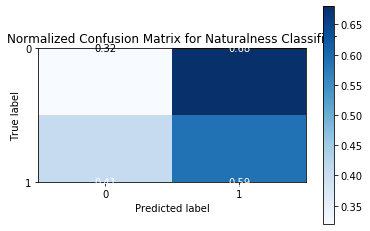

In [106]:
skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True, title='Normalized Confusion Matrix for Naturalness Classifier');
plt.savefig('confusion_matrix_withdonor')
plt.show()

# ROC Curve

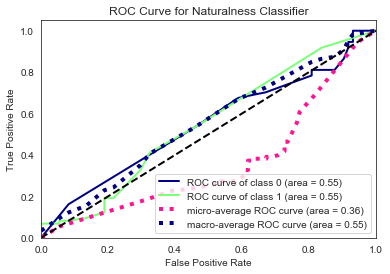

In [125]:
skplt.metrics.plot_roc(y_true, predict_proba, title='ROC Curve for Naturalness Classifier', 
                    cmap='jet');
plt.savefig('ROC_plot+')
plt.show()

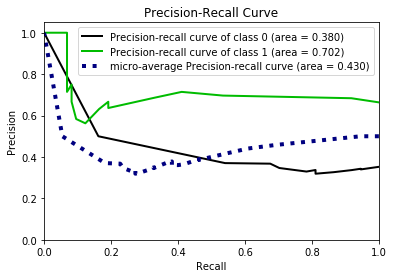

In [108]:
skplt.metrics.plot_precision_recall(y_true, predict_proba);
plt.savefig('PR-curve')
plt.show()

# Calibration Curve
Plotting the calibration curves of a classifier is useful for determining whether or not you can interpret their predicted probabilities directly as as confidence level. For instance, a well-calibrated binary classifier should classify the samples such that for samples to which it gave a score of 0.8, around 80% should actually be from the positive class.

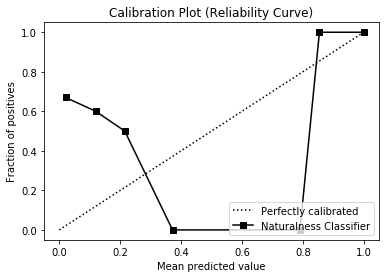

In [110]:
skplt.metrics.plot_calibration_curve(y_true, [predict_proba], ['Naturalness Classifier'], title='Calibration Plot (Reliability Curve)');
plt.savefig('CalibrationCurve')
plt.show()

In [119]:
roc_curve(y_true, y_pred)

(array([0.        , 0.67567568, 1.        ]),
 array([0.       , 0.5890411, 1.       ]),
 array([2, 1, 0]))

In [120]:
df['ID'] = [i for i in range(df.shape[0])]

In [121]:
df['naturalness_mturk_delta'] = df['style_naturalness_mturk_probability'] - df['donor_naturalness_mturk_probability']

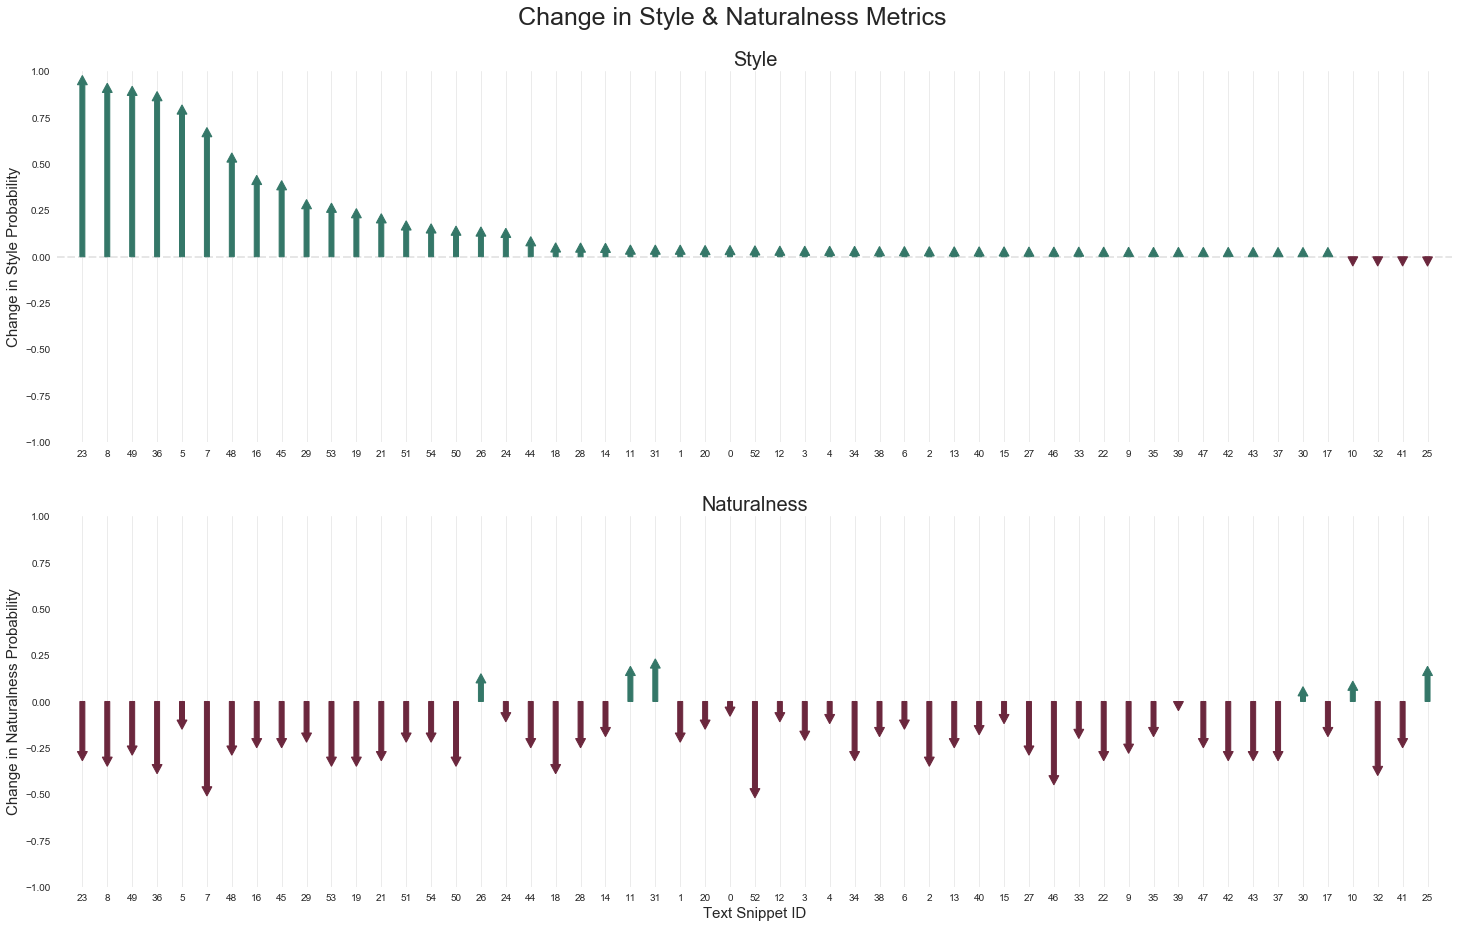

In [122]:
sns.set_style('white')
n=df['new_processed'].shape[0]

data = df.sort_values(by='authorship_delta', ascending=False) \
           .reset_index(drop=True)

#initialize a plot
fig, (ax, ax2) = plt.subplots(2,1,figsize=(25,15))  #create figure
ax.set_ylim(-1, 1)                        #set x axis limits
ax.set_xlim(-1, n)                        #set y axis limits
ax.set_xticks(range(n))                  #add 0-n ticks
ax.set_xticklabels(data['ID'])      #add y tick labels

#define arrows
arrow_starts = np.repeat(0,n)
arrow_lengths = data['authorship_delta'].values

#add arrows to plot 1
for i, subject in enumerate(data['new_processed']):
    
    if arrow_lengths[i] == 0:
        arrow_lengths[i]-= 0.0001 
    elif arrow_lengths[i] > 0:
        arrow_color = '#347768'
    elif arrow_lengths[i] < 0:
        arrow_color = '#6B273D'
    #else:
    #   arrow_color = 'black'
    
    ax.arrow(i,#x start point
             arrow_starts[i],#y start point        
             0,#change in x                      
             arrow_lengths[i], #change in y                          
             head_width=0.4,         #arrow head width
             head_length=0.05,        #arrow head length
             width=0.2,              #arrow stem width
             fc=arrow_color,             #arrow fill color
             ec=arrow_color)             #arrow edge color
    
#format plot
ax.set_title('Style', size=20)                     #add title
ax.axhline(y=0, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.grid(axis='x', color='0.9')                        #add a light grid
ax.set_ylim(-1,1)                                     #set x axis limits
ax.set_ylabel('Change in Style Probability', size=15)                               #label the x axis
#ax.set_xlabel('Text Snippet ID', size=15)                          #label the y axis
sns.despine(left=True, bottom=True)                   #remove axes


ax2.set_ylim(-1, 1)                        #set y axis limits
ax2.set_xlim(-1, n)                        #set x axis limits
ax2.set_xticks(range(n))                  #add 0-n ticks
ax2.set_xticklabels(data['ID'])      #add x tick labels


#define arrows for plot 2
arrow_starts = np.repeat(0,n)
arrow_lengths = data['naturalness_mturk_delta'].values

#add arrows to plot 2
for i, subject in enumerate(data['new_processed']):
    
    if arrow_lengths[i] == 0:
        arrow_lengths[i]-= 0.0001 
    elif arrow_lengths[i] > 0:
        arrow_color = '#347768'
    elif arrow_lengths[i] < 0:
        arrow_color = '#6B273D'
    #else:
    #   arrow_color = 'black'
    
    ax2.arrow(i,        #x start point
             arrow_starts[i],                     #y start point
             0,        #change in x 
             arrow_lengths[i],                     #change in y
             head_width=0.4,         #arrow head width
             head_length=0.05,        #arrow head length
             width=0.2,              #arrow stem width
             fc=arrow_color,             #arrow fill color
             ec=arrow_color)             #arrow edge color
    
#format plot
ax2.set_title('Naturalness', size=20)                     #add title
ax.axhline(y=0, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax2.grid(axis='x', color='0.9')                        #add a light grid
ax2.set_ylim(-1,1)                                     #set x axis limits
ax2.set_ylabel('Change in Naturalness Probability', size=15)                               #label the x axis
ax2.set_xlabel('Text Snippet ID', size=15)                          #label the y axis
sns.despine(left=True, bottom=True)                   #remove axes
fig.suptitle('Change in Style & Naturalness Metrics', fontsize=25, y=0.94)
plt.savefig('StyleNaturalnessStackedArrowPlot-Flipped-MturkNat')

In [113]:
df.columns

Index(['old', 'new', 'old_masked', 'new_masked', 'label',
       'donor_naturalness_score', 'style_naturalness_score',
       'naturalness_delta', 'old_processed', 'new_processed',
       'style_naturalness_mturk_score', 'style_naturalness_mturk_probability',
       'style_authorship_score', 'authorship_delta', 'donor_authorship_score',
       'donor_naturalness_mturk_probability_score',
       'donor_naturalness_mturk_probability', 'clf_style_label', 'style_label',
       'style_label_unnatural_class', 'style_unnatural_score',
       'clf_donor_label', 'donor_label', 'donor_label_unnatural_class',
       'donor_unnatural_score'],
      dtype='object')

In [154]:
kappa = pd.read_csv('kappa.csv')

In [155]:
from statsmodels.stats.inter_rater import fleiss_kappa

In [156]:
kappa.head()

,Input.text,Answer.naturalness.label,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Therefore no one inhabits it; I think I see no...,Equally Natural & Unnatural,NaN,NaN,NaN
1,Therefore no one inhabits it; I think I see no...,Mostly Natural,NaN,NaN,NaN
2,Therefore no one inhabits it; I think I see no...,Equally Natural & Unnatural,NaN,NaN,NaN
3,"Therefore no one inhabits it; I, as you, know ...",Mostly Unnatural,NaN,NaN,NaN
4,"Therefore no one inhabits it; I, as you, know ...",Equally Natural & Unnatural,NaN,NaN,NaN


In [158]:
kappa = kappa[['Input.text', 'Answer.naturalness.label']]
kappa.head()

,Input.text,Answer.naturalness.label
0,Therefore no one inhabits it; I think I see no...,Equally Natural & Unnatural
1,Therefore no one inhabits it; I think I see no...,Mostly Natural
2,Therefore no one inhabits it; I think I see no...,Equally Natural & Unnatural
3,"Therefore no one inhabits it; I, as you, know ...",Mostly Unnatural
4,"Therefore no one inhabits it; I, as you, know ...",Equally Natural & Unnatural


In [182]:
kappa.fillna('N/A', inplace=True)
kappa['rating'] = kappa['Answer.naturalness.label'].map({'Equally Natural & Unnatural' : 3,
                                                        'Mostly Natural': 4,
                                                        'Mostly Unnatural':2,
                                                        'Completely Unnatural':1,
                                                        'Completely Natural': 5,
                                                        'N/A':0})
kappa['rating'].value_counts()

3    63
2    55
4    36
5    13
1     2
0     2
Name: rating, dtype: int64

In [165]:
kappa.head()

,Input.text,Answer.naturalness.label,rating
0,Therefore no one inhabits it; I think I see no...,Equally Natural & Unnatural,3.0
1,Therefore no one inhabits it; I think I see no...,Mostly Natural,4.0
2,Therefore no one inhabits it; I think I see no...,Equally Natural & Unnatural,3.0
3,"Therefore no one inhabits it; I, as you, know ...",Mostly Unnatural,2.0
4,"Therefore no one inhabits it; I, as you, know ...",Equally Natural & Unnatural,3.0


In [199]:
values = []
for i, text in enumerate(kappa['Input.text']):
    values.append(kappa[kappa['Input.text'] == text]['rating'].tolist())
    


In [226]:
rater1 = np.array([x[0] for x in values]).tolist()
rater2 = np.array([x[1] for x in values]).tolist()
rater3 = np.array([x[2] for x in values]).tolist()